In [1]:
import matplotlib.pyplot as plt
import random, shutil, pickle, sys
import numpy as np
from collections import deque
from keras import Sequential
from keras.optimizers import RMSprop
from IPython.display import display
from PIL import Image
import pandas as pd
from keras import Model
import keras, os, glob
import tensorflow as tf
from keras.layers import Layer, Dense, Flatten, RepeatVector,Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from keras.layers import Activation, Bidirectional ,Dropout
from keras import layers
# import cv2
# from sklearn.preprocessing import StandardScaler
import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler
import codecs
import csv
import secrets
import sqlite3
from IPython.display import display
from IPython.display import clear_output
import time
from tabulate import tabulate
import json
import datetime
from tensorflow.keras.optimizers import Adam
import math, datetime

Load Dataset

In [2]:
m5short_step_4 = pd.read_csv("final_complete_m5short_timestep_4.csv")
m1short_step_4 = pd.read_csv("final_complete_m1short_timestep_4.csv")
m1long_step_4 = pd.read_csv("final_complete_m1long_timestep_4.csv")
m5long_step_4 = pd.read_csv("final_complete_m5long_timestep_4.csv")

In [2]:
!ls

'=1.0.1'
'=2.6.8'
 Agent32.ipynb
 Behaviour.ipynb
 colab
 colabM1M5
 colabM1M5.zip
 Controller32.ipynb
 data_atari_seq
 DatasetCreator.ipynb
 env
 env10
 filerenamer.sh
 final_complete_m1long_timestep_4.csv
 final_complete_m1short.csv
 final_complete_m1short_timestep_4.csv
 final_complete_m5long_timestep_4.csv
 final_complete_m5short_timestep_4.csv
 final_m1long.csv
 final_m1short.csv
 final_m5long.csv
 final_m5short.csv
 full-example.ipynb
 LiquidBot.ipynb
 liquid.ipynb
 Liquids.py
 logs
 M1M5Charts
 M1M5Charts.7z
 M1M5Charts_colab
 M1M5Charts_colab.zip
 modelALETrial.h5
 models
 ModelsLab.ipynb
 NematodeWiring.ipynb
 NewDawnForex.ipynb
 NewDawn.ipynb
 RayLiquidBotForex.ipynb
 RayLiquidForex.py
 RewardFunc.ipynb
 rlattention.h5
 rl_ckpt
 rl_ckpt_forex
 RLMultiheadAttention.py
 RLMultiheadHeadAttention-Copy2.ipynb
 RLMultiheadHeadAttention.ipynb
 RLSelfAttention-Copy1.ipynb
 spacefilecreator.sh
 T32_256.ipynb
 T32_v3.py
 T32_v5.py
 test
 Transformatics.ipynb
 Transformatics.py
 Transfo

In [3]:
import numpy as np
import os
from tensorflow import keras
from ncps import wirings
from ncps.tf import LTC
import pandas as pd

In [4]:
wiring = wirings.AutoNCP(8,1) # 8 neurons in total, 1 output (motor neuron)

model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None, 2)),
        # here we could potentially add layers before and after the LTC network
        LTC(wiring, return_sequences=True),
    ]
)
model.compile(
    optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error'
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ltc (LTC)                   (None, None, 1)           350       
                                                                 
Total params: 350
Trainable params: 350
Non-trainable params: 0
_________________________________________________________________


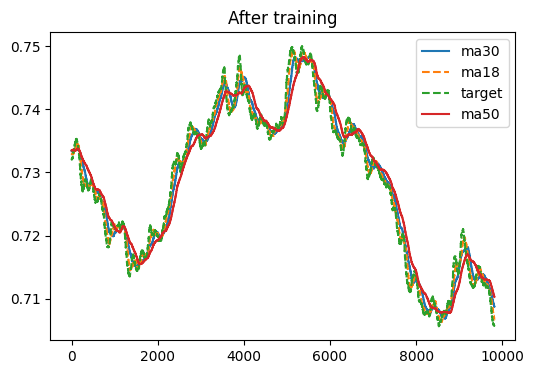

In [6]:
target = list(m1long_step_4.iloc[:]["MA 10"] * 0.0001)
ma30 = list(m1long_step_4.iloc[:]["MA 30"] * 0.0001)
ma18 = list(m1long_step_4.iloc[:]["MA 18"] * 0.0001)
ma50 = list(m1long_step_4.iloc[:]["MA 50"] * 0.0001)
ma100 = list(m1long_step_4.iloc[:]["MA 100"] * 0.0001)
ma200 = list(m1long_step_4.iloc[:]["MA 200"] * 0.0001)

import matplotlib.pyplot as plt

# import matplotlib.pyplot as plt
# a1 = np.array(ma18)
# a2 = np.array(ma30)
# a = np.expand_dims( np.stack([a1 , a2], axis=1), axis = 0)
# b = np.array(target)

# b=b.reshape(1,len(b), 1)
# hist = model.fit(x=a, y=b, batch_size=1, epochs=500,verbose=1)

# prediction = model(a).numpy()
# plt.figure(figsize=(6, 4))
# plt.plot(b[0, :, 0], label="Target output")
# plt.plot(prediction[0, :, 0], label="LTC output",linestyle="dashed")
# # plt.ylim((-1, 1))|
# plt.legend(loc="upper right")
# plt.title("After training")
# plt.show()

# # prediction = model(a).numpy()
plt.figure(figsize=(6, 4))
plt.plot(ma30, label="ma30")
plt.plot(ma18, label="ma18",linestyle="dashed")
plt.plot(target, label="target",linestyle="dashed")
plt.plot(ma50, label="ma50")
# plt.plot(ma100, label="ma100")
# plt.plot(ma200, label="ma200")
# plt.ylim((-1, 1))|
plt.legend(loc="upper right")
plt.title("After training")
plt.show()

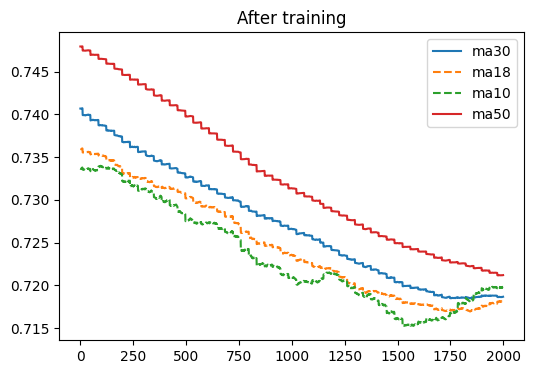

In [20]:
target = list(m5long_step_4.iloc[:2000]["MA 10"] * 0.0001)
ma30 = list(m5long_step_4.iloc[:2000]["MA 30"] * 0.0001)
ma18 = list(m5long_step_4.iloc[:2000]["MA 18"] * 0.0001)
ma50 = list(m5long_step_4.iloc[:2000]["MA 50"] * 0.0001)
ma100 = list(m5long_step_4.iloc[:2000]["MA 100"] * 0.0001)
ma200 = list(m5long_step_4.iloc[:2000]["MA 200"] * 0.0001)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(ma30, label="ma30")
plt.plot(ma18, label="ma18",linestyle="dashed")
plt.plot(target, label="ma10",linestyle="dashed")
plt.plot(ma50, label="ma50")
# plt.plot(ma100, label="ma100")
# plt.plot(ma200, label="ma200")
# plt.ylim((-1, 1))|
plt.legend(loc="upper right")
plt.title("After training")
plt.show()

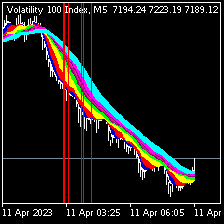

In [24]:
img = Image.open("M1M5Charts/"+m5long_step_4.iloc[1784]["image_path"])
display(img)

In [ ]:
position = None
reward = 0
profit = 0
current_trade={}
current_trade["entry_price"] = 0
a_profits = 0
for k , v in m1long_step_4[:9000].iterrows():
    ma10 = v["MA 10"]
    ma18 = v["MA 18"]
    ma30 = v["MA 30"]
    ma50 = v["MA 50"]
    
    if ma10 < ma18 and ma10 < ma30:# and ma10 < ma50:
        # print(f"{k} reward 1 position sell")
        if position == "buy":
            profit += abs(v["Bid"] - current_trade["entry_price"])
            position = None
            print("Trade buy closed at", v["Bid"], "profit", profit)
        elif position == None:
            current_trade["entry_price"] = v["Bid"]
            position = "sell"
        elif position == "sell":
            print("accumulative_profits: " , abs(v["Bid"] - current_trade["entry_price"]))
            pass
        
    if ma10 > ma18 and ma10 > ma30:# and ma10 > ma50:
        # print(f"{k} reward 1 position buy")
        if position == "sell":
            profit += abs(v["Ask"] - current_trade["entry_price"])
            position = None
            print("Trade sell closed at", v["Ask"], "profit", profit)
        elif position == None:
            current_trade["entry_price"] = v["Ask"]
            position = "buy"
            print("Trade position buy opened")
        elif position == "buy":
            print("accumulative_profits: " , abs(v["Bid"] - current_trade["entry_price"]))
            pass
print("Total_profits are ", profit)

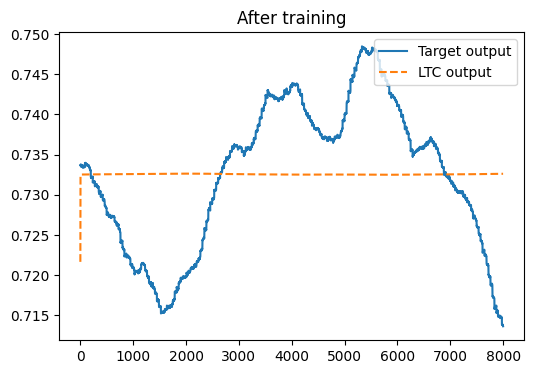

In [37]:
prediction = model(a).numpy()
plt.figure(figsize=(6, 4))
plt.plot(b[0, :, 0], label="Target output")
plt.plot(prediction[0, :, 0], label="LTC output",linestyle="dashed")
# plt.ylim((-1, 1))|
plt.legend(loc="upper right")
plt.title("After training")
plt.show()


In [4]:
for k, v in m5long_step_4.iterrows():
    print(k, v)
    break

0 TimeStamp                                        2023.04.11-04:48:38
image_path         Volatility_100_Index_M5_1595334152023.04.11-04...
Open                                                          7305.4
Close                                                         7328.4
High                                                         7343.12
Low                                                           7305.4
Ask                                                          7330.07
Bid                                                           7328.4
MA 5                                                        7333.226
MA 8                                                         7331.37
MA 10                                                       7336.584
MA 14                                                      7347.6614
MA 18                                                        7359.47
MA 24                                                        7380.44
MA 30                           

In [28]:
def reward_function(agent, current_state, action, next_state):
    if action == "sell":
        trade_profit = current_state["entry_price"] - next_state["exit_price"]
    else:
        trade_profit = next_state["exit_price"] - current_state['entry_price']
        
    holding_time = next_state["time"] - current_state["time"]
    trade_frequency_penalty = 0
    
    if agent.last_trade_time is not None:
        time_since_last_trade = current_state["time"] - agent.last_trade_time
        if time_since_last_trade < min_time_between_trades:
            trade_frequency_penalty = trade_penalty
    reversal_reward = 0
    if action == "close_trade" or action == "idle":
        if correctly_identified_reversal(current_state, next_state):
            reversal_reward = reversal_bonus
    reward = trade_profit - holding_time_penalty * holding_time - trade_frequency_penalty + reversal_reward
    
    return reward

def moving_average(data, window):
    return sum(data[-window:])/window

def correctly_identified_reversal(current_state, next_state):
    short_window = 5
    long_window = 20
    
    current_short_ma = moving_average(current_state["price_history"], short_window)
    current_long_ma = moving_average(current_state["price_history"], long_window)
    next_short_ma = moving_average(next_state["price_history"], short_window)
    next_long_ma = moving_average(next_state["price_history"], long_window)
    
    #check for a bullish reversal (short MA crosses above long MA)
    bullish_reversal = current_short_ma < current_long_ma and next_short_ma > next_long_ma
    
    #check for a bearish reversal (short MA crosses below long MA)
    bearish_reversal = current_short_ma > current_long_ma and next_short_ma < next_long_ma
    
    return bullish_reversal or bearish_reversal

class DummyAgent:
    def __init__(self):
        self.last_trade_time = None
  

# Parameters
holding_time_penalty = 1
min_time_between_trades = 5
trade_penalty = 10
reversal_bonus = 20


dummy_agent = DummyAgent()
# current_state = {
#     'balance': 1000,
#     'time': 10,
#     'price_history': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
# }
# next_state = {
#     'balance': 1020,
#     'time': 40,
#     'price_history': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
# }
# action = 'close_trade'

# # Call the reward function
# reward = reward_function(dummy_agent, current_state, action, next_state)
# print("Reward:", reward)


In [29]:
# prices[:30]

In [9]:
import math

In [30]:
# prices[:30][-10:]

In [13]:
math.floor(101)

101

In [ ]:
position = "sell"
account_balance = 1000
current_state = {
    'balance': account_balance,
    'time': 1,
    'price_history':prices[:30][-20:],
    'entry_price': prices[:30][-20:][0],
    'exit_price': prices[:30][-20:][0]
}
start = 40
for key, price in enumerate(prices[start:]):
    if position == "sell":
        next_state = {
            'balance': account_balance,
            'time': current_state["time"] + key + 1,
            'price_history': prices[:start+key+1][-10:],
            'entry_price': current_state["entry_price"],
            'exit_price': price
        }
        print(next_state)
        print(current_state)
        reward = reward_function(dummy_agent, current_state, position, next_state)
        print(f"Rewards {reward}")
        print()
        if key == 100:
            break
    
    
    

In [42]:
def reward_function(profit_loss, time_steps, account_balance, trade_reversal):
    p_factor = max(0, profit_loss * 0.01)  # Profit/Loss factor
    t_factor = max(0, (1 - time_steps/5000))  # Time step factor
    b_factor = max(0, account_balance * 0.00001)  # Account balance factor
    if trade_reversal >= 0.8:  # No penalty for trades above 80% of highest profit
        return p_factor * t_factor * b_factor
    else:  # Penalty for trades below 80% of highest profit
        return -0.5 * p_factor * t_factor * b_factor


In [85]:
from tabulate import tabulate
headers = ["profit_factor", "time_factor", "bal_factor"]
account_balance = 1000
profits = []
steps = []
for profit_loss in range(0,300):
    rows = []
    p_factor = max(0, profit_loss * 0.001)
    t_factor = max(0, (1-profit_loss/5000))
    b_factor = max(0, account_balance * 0.00001)
    profits.append(p_factor)
    steps.append(t_factor)
    row = [p_factor, t_factor, b_factor]
    rows.append(row)
    # print(tabulate(rows,headers = headers, tablefmt="grid"))


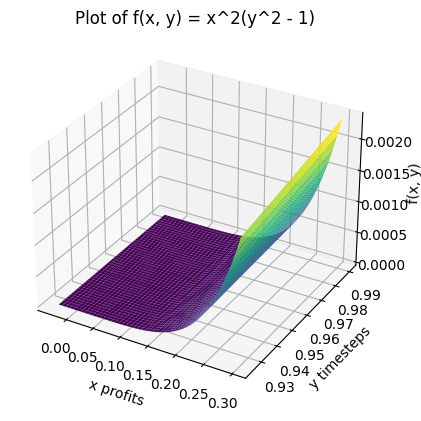

In [25]:
from tabulate import tabulate
headers = ["profit_factor", "time_factor", "bal_factor"]
account_balance = 1000
profits = []
steps = []
for profit_loss in range(-30,300, 1):
    rows = []
    if profit_loss % 10 == 0:
        account_balance += 30
    p_factor = max(0, profit_loss * 0.001) if profit_loss >= 0 else profit_loss * 0.001
    t_factor = max(0, (1-(profit_loss+30)/5000)*0.99)
    b_factor = max(0, account_balance * 0.00001)
    profits.append(p_factor)
    steps.append(t_factor)
    row = [p_factor, t_factor, b_factor]
    rows.append(row)
    # print(tabulate(rows,headers = headers, tablefmt="grid"))
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x, y, b):
    return x**3 * (y**3 + b) * x**2

# Generate x and y values
x = np.array(profits)#np.linspace(-10, 10, 100)
y = np.array(steps)#np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values for each (x, y) pair
Z = f(X, Y, b_factor)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis')

# Set labels and title
ax.set_xlabel('x profits')
ax.set_ylabel('y timesteps')
ax.set_zlabel('f(x, y)')
ax.set_title('Plot of f(x, y) = x^2(y^2 - 1)')

# Show the plot
plt.show()


In [91]:
Z[2]

array([-0.00000000e+00, -7.99840000e-10, -3.19936000e-09, -7.19856000e-09,
       -1.27974400e-08, -1.99960000e-08, -2.87942400e-08, -3.91921600e-08,
       -5.11897600e-08, -6.47870400e-08, -7.99840000e-08, -9.67806400e-08,
       -1.15176960e-07, -1.35172960e-07, -1.56768640e-07, -1.79964000e-07,
       -2.04759040e-07, -2.31153760e-07, -2.59148160e-07, -2.88742240e-07,
       -3.19936000e-07, -3.52729440e-07, -3.87122560e-07, -4.23115360e-07,
       -4.60707840e-07, -4.99900000e-07, -5.40691840e-07, -5.83083360e-07,
       -6.27074560e-07, -6.72665440e-07, -7.19856000e-07, -7.68646240e-07,
       -8.19036160e-07, -8.71025760e-07, -9.24615040e-07, -9.79804000e-07,
       -1.03659264e-06, -1.09498096e-06, -1.15496896e-06, -1.21655664e-06,
       -1.27974400e-06, -1.34453104e-06, -1.41091776e-06, -1.47890416e-06,
       -1.54849024e-06, -1.61967600e-06, -1.69246144e-06, -1.76684656e-06,
       -1.84283136e-06, -1.92041584e-06, -1.99960000e-06, -2.08038384e-06,
       -2.16276736e-06, -

In [44]:
prices = list(range(1,100, 10))
import random
# random.shuffle(prices)
prices

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

In [95]:
for i in range(0, 100):
    reward = reward_function(prices[i], i, 1200, 0.9)
    print(reward)

0.8796084
0.87916733136
0.8789638737600002
0.8785637452800001
0.87822605664
0.8786316888000001
0.87927680016
0.87907796544
0.8789594112000001
0.8795619336
0.8786419943999999
0.8785688868
0.87824553984
0.8780766494399999
0.87780604176
0.8778501252
0.8776919692799999
0.87739747128
0.87724530672
0.8773836244800001
0.8768166479999999
0.8761924703999999
0.87570467088
0.87549172704
0.8754029990399999
0.876113022
0.8756181849599999
0.8756724952800001
0.8759534361599999
0.8757235720800002
0.8755080432000001
0.87547737696
0.87583296384
0.875791374
0.87549229248
0.875611512
0.8756019456000003
0.8748049816800001
0.8754039792
0.8750251488
0.874455936
0.8738023802400001
0.8734226985600002
0.8730157363200001
0.8730775065599999
0.8737159428
0.87333748944
0.8723897208
0.8727186911999999
0.8730914224800002
0.8732180159999999
0.8733302340000002
0.874103784
0.87356738016
0.8729136048000001
0.8727703464000001
0.8726401267200001
0.8733391260000002
0.8734720108799999
0.8736688058400001
0.8737279200000002
0.

In [68]:
for i in range(0, 10):
    reward = reward_function(prices[i], i, 3000, 0.6)
    print(reward)

-1.0995105
-1.0989591642
-1.0987048422000003
-1.0982046816000002
-1.0977825708
-1.0982896110000002
-1.0990960002
-1.0988474568000002
-1.0986992640000002
-1.0994524170000002


In [63]:
def correctly_identified_reversal(current_state, next_state):
    short_window = 5
    long_window = 20
    
    current_short_ma = moving_average(current_state["price_history"], short_window)
    current_long_ma = moving_average(current_state["price_history"], long_window)
    next_short_ma = moving_average(next_state["price_history"], short_window)
    next_long_ma = moving_average(next_state["price_history"], long_window)
    
    #check for a bullish reversal (short MA crosses above long MA)
    bullish_reversal = current_short_ma < current_long_ma and next_short_ma > next_long_ma
    
    #check for a bearish reversal (short MA crosses below long MA)
    bearish_reversal = current_short_ma > current_long_ma and next_short_ma < next_long_ma
    if bullish_reversal or bearish_reversal:
        print("Gotcha")
    return bullish_reversal or bearish_reversal

In [65]:
position = "sell"
account_balance = 1000
current_state = {
    'balance': account_balance,
    'time': 0,
    'price_history':prices[:30][-20:],
    'entry_price': prices[:30][-20:][0],
    'exit_price': prices[:30][-20:][0]
}
start = 40
for key, price in enumerate(prices[start:]):
    if position == "sell":
        # print("position")
        next_state = {
            'balance': account_balance,
            'time': key + 1,
            'price_history': prices[:start+key+1][-10:],
            'entry_price': prices[:30][-20:][0],
            'exit_price': price
        }
        # print(next_state)
        # print(current_state)
        status = correctly_identified_reversal(current_state, next_state)
        if status:
            print(status)
        # reward = reward_function(dummy_agent, current_state, position, next_state)
        # print(f"Rewards {reward}")
        # print()
        if key == 5000:
            break
        current_state = next_state

In [ ]:
def reward_function(profit_loss, time_steps, account_balance, trade_reversal):
    p_factor = max(0, profit_loss * 0.01)  # Profit/Loss factor
    t_factor = max(0, (1 - time_steps/5000))  # Time step factor
    b_factor = max(0, account_balance * 0.00001)  # Account balance factor
    if trade_reversal >= 0.8:  # No penalty for trades above 80% of highest profit
        return p_factor * t_factor * b_factor
    else:  # Penalty for trades below 80% of highest profit
        return -0.5 * p_factor * t_factor * b_factor

In [92]:
# Define the list of profit values for 20 time steps
profit_values = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200,
                 210, 220, 230, 240, 250, 260, 270, 280, 290]

# Test the reward function for each time step
for timestep, profit in enumerate(profit_values):
    reward = (profit**2) * (timestep**2 - 1)
    print("Time Step:", timestep, "Profit:", profit, "Reward:", reward)


Time Step: 0 Profit: 100 Reward: -10000
Time Step: 1 Profit: 110 Reward: 0
Time Step: 2 Profit: 120 Reward: 43200
Time Step: 3 Profit: 130 Reward: 135200
Time Step: 4 Profit: 140 Reward: 294000
Time Step: 5 Profit: 150 Reward: 540000
Time Step: 6 Profit: 160 Reward: 896000
Time Step: 7 Profit: 170 Reward: 1387200
Time Step: 8 Profit: 180 Reward: 2041200
Time Step: 9 Profit: 190 Reward: 2888000
Time Step: 10 Profit: 200 Reward: 3960000
Time Step: 11 Profit: 210 Reward: 5292000
Time Step: 12 Profit: 220 Reward: 6921200
Time Step: 13 Profit: 230 Reward: 8887200
Time Step: 14 Profit: 240 Reward: 11232000
Time Step: 15 Profit: 250 Reward: 14000000
Time Step: 16 Profit: 260 Reward: 17238000
Time Step: 17 Profit: 270 Reward: 20995200
Time Step: 18 Profit: 280 Reward: 25323200
Time Step: 19 Profit: 290 Reward: 30276000


In [93]:
import numpy as np

# Define the number of time steps
num_timesteps = 20

# Define the parameters for the profit curve
initial_profit = 100
fluctuation_range = 20  # The range of profit fluctuations
fluctuation_step = 5  # The step size for profit fluctuations

# Generate the profit values over time with fluctuations
profit_values = []
profit = initial_profit
for timestep in range(num_timesteps):
    profit += np.random.randint(-fluctuation_range, fluctuation_range + 1, size=1)[0]
    profit_values.append(profit)

# Test the reward function for each time step
for timestep, profit in enumerate(profit_values):
    reward = (profit**2) * (timestep**2 - 1)
    print("Time Step:", timestep, "Profit:", profit, "Reward:", reward)


Time Step: 0 Profit: 110 Reward: -12100
Time Step: 1 Profit: 116 Reward: 0
Time Step: 2 Profit: 111 Reward: 36963
Time Step: 3 Profit: 95 Reward: 72200
Time Step: 4 Profit: 80 Reward: 96000
Time Step: 5 Profit: 60 Reward: 86400
Time Step: 6 Profit: 74 Reward: 191660
Time Step: 7 Profit: 76 Reward: 277248
Time Step: 8 Profit: 90 Reward: 510300
Time Step: 9 Profit: 109 Reward: 950480
Time Step: 10 Profit: 96 Reward: 912384
Time Step: 11 Profit: 98 Reward: 1152480
Time Step: 12 Profit: 84 Reward: 1009008
Time Step: 13 Profit: 101 Reward: 1713768
Time Step: 14 Profit: 96 Reward: 1797120
Time Step: 15 Profit: 81 Reward: 1469664
Time Step: 16 Profit: 92 Reward: 2158320
Time Step: 17 Profit: 88 Reward: 2230272
Time Step: 18 Profit: 89 Reward: 2558483
Time Step: 19 Profit: 86 Reward: 2662560


In [94]:
import numpy as np

# Define the number of time steps
num_timesteps = 20

# Define the parameters for the profit curve
initial_profit = 100
fluctuation_range = 20  # The range of profit fluctuations
fluctuation_step = 5  # The step size for profit fluctuations

# Define the desired range for normalized rewards
min_reward = 0
max_reward = 1

# Generate the profit values over time with fluctuations
profit_values = []
profit = initial_profit
for timestep in range(num_timesteps):
    profit += np.random.randint(-fluctuation_range, fluctuation_range + 1, size=1)[0]
    profit_values.append(profit)

# Normalize the profit values
min_profit = min(profit_values)
max_profit = max(profit_values)
normalized_profits = [(p - min_profit) / (max_profit - min_profit) for p in profit_values]

# Test the reward function for each time step
for timestep, profit in enumerate(normalized_profits):
    reward = (profit**2) * (timestep**2 - 1)
    scaled_reward = min_reward + reward * (max_reward - min_reward)
    print("Time Step:", timestep, "Profit:", profit, "Reward:", scaled_reward)


Time Step: 0 Profit: 0.7291666666666666 Reward: -0.5316840277777777
Time Step: 1 Profit: 0.4166666666666667 Reward: 0.0
Time Step: 2 Profit: 0.7291666666666666 Reward: 1.595052083333333
Time Step: 3 Profit: 0.8958333333333334 Reward: 6.420138888888889
Time Step: 4 Profit: 0.5416666666666666 Reward: 4.401041666666666
Time Step: 5 Profit: 0.5 Reward: 6.0
Time Step: 6 Profit: 0.2708333333333333 Reward: 2.5672743055555554
Time Step: 7 Profit: 0.4166666666666667 Reward: 8.333333333333334
Time Step: 8 Profit: 0.5416666666666666 Reward: 18.484374999999996
Time Step: 9 Profit: 0.3541666666666667 Reward: 10.034722222222223
Time Step: 10 Profit: 0.7083333333333334 Reward: 49.67187500000001
Time Step: 11 Profit: 0.9583333333333334 Reward: 110.20833333333334
Time Step: 12 Profit: 1.0 Reward: 143.0
Time Step: 13 Profit: 0.7083333333333334 Reward: 84.29166666666667
Time Step: 14 Profit: 0.3125 Reward: 19.04296875
Time Step: 15 Profit: 0.4791666666666667 Reward: 51.430555555555564
Time Step: 16 Profi

In [96]:
import numpy as np

# Assuming you have a list of profit values
profit_values = [100, 200, 150, 120, 180, 250]

# Take the logarithm of the profit values
log_profit = np.log(profit_values)

# Scale the logarithmic values to the range [0, 1]
scaled_log_profit = (log_profit - np.min(log_profit)) / (np.max(log_profit) - np.min(log_profit))

print(scaled_log_profit)


[0.         0.7564708  0.44250705 0.19897785 0.6414849  1.        ]


In [97]:
import numpy as np

def calculate_reward(profit):
    if profit >= 0:
        return np.log(profit + 1)  # Use log function for positive profits
    else:
        return -np.log(-profit + 1)  # Use negative log function for negative profits

# Example profit values obtained by the agent
profits = [100, -50, 200, -80, 150]

rewards = [calculate_reward(profit) for profit in profits]

print(rewards)


[4.61512051684126, -3.9318256327243257, 5.303304908059076, -4.394449154672439, 5.017279836814924]


[-10.0, -7.777777777777778, -5.555555555555555, -3.333333333333333, -1.1111111111111107, 1.1111111111111107, 3.333333333333334, 5.555555555555557, 7.777777777777779, 10.0]

[-10.0, -7.777777777777778, -5.555555555555555, -3.333333333333333, -1.1111111111111107, 1.1111111111111107, 3.333333333333334, 5.555555555555557, 7.777777777777779, 10.0]


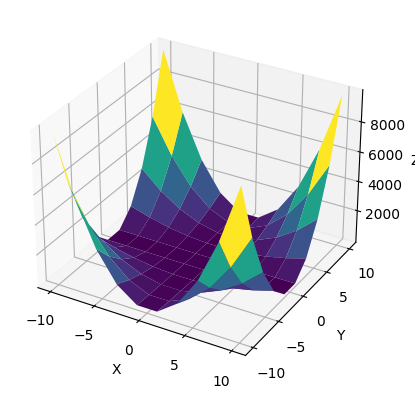

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate sample data for x and y coordinates
x = np.linspace(-10, 10, 10)  # Sample x-coordinates
y = np.linspace(-10, 10, 10)  # Sample y-coordinates
print(list(x))
print()
print(list(y))
# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values based on your reward function
Z = X**2 * (Y**2 - 1)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.show()


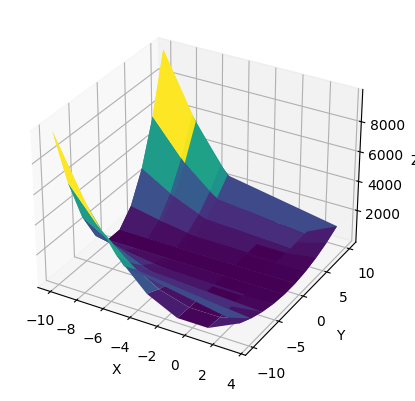

array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,  -5.        ,
        -7.5       , -10.        ])

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate sample data for x and y coordinates
x = np.linspace(-10, 10, 100)  # Sample x-coordinates
y = np.linspace(-10, 10, 100)  # Sample y-coordinates

# Decrease the last 30% of x values
# x[-30:] = np.flip(np.linspace(, -5, 30))

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values based on your reward function
Z = X**2 * (Y**2 - 1)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.show()
x

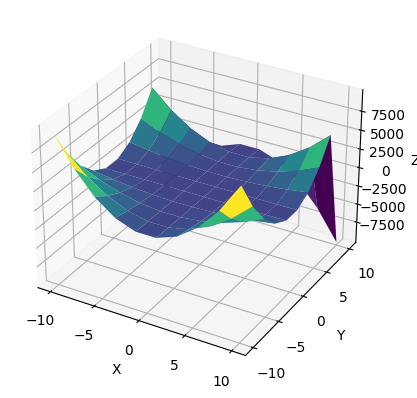

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate sample data for x and y coordinates
x = np.linspace(-10, 10, 10)  # Sample x-coordinates
y = np.linspace(-10, 10, 10)  # Sample y-coordinates

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values based on your reward function
Z = X**2 * (Y**2 - 1)

# Find the index where the 70% threshold is reached
threshold_index = int(len(Z) * 0.8)

# Gradually decrease Z values after the 70% element
decrease_factor = np.linspace(1.0, -1, len(Z) - threshold_index)
Z[threshold_index:] *= decrease_factor[:, np.newaxis]

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate sample data for x and y coordinates
x = np.linspace(-10, 10, 10)  # Sample x-coordinates
y = np.linspace(-10, 10, 10)  # Sample y-coordinates
print(list(x))
print()
print(list(y))
# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values based on your reward function
Z = X**2 * (Y**2 - 1)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.show()
